In [1]:
%run '/home/gvolta/Desktop/Function/Useful/Def.ipynb'

Initialization done, Notebook was last run on: 03/07/2019


In [2]:
from pax import units, configuration
pax_config = configuration.load_configuration('XENON1T')['DEFAULT']
tpc_height = pax_config['tpc_length']
tpc_radius = pax_config['tpc_radius']

import hax
hax.init(experiment='XENON1T',
         pax_version_policy = 'v6.10.1',
         main_data_paths= ['/dali/lgrandi/xenon1t/processed/pax_v6.10.1'], 
         minitree_paths = ['/dali/lgrandi/giovo/minitrees/pax_v6.10.1',
                           '/dali/lgrandi/xenon1t/minitrees/pax_v6.10.1'],
         make_minitrees = False)

%matplotlib inline

In [3]:
file4 = '/project/lgrandi/ccapelli/haxcache/bkg_newmaps_pax6.10.1_aftercuts.haxcache'
data4 = hax.minitrees.load_cache_file(file4)

/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/hax-2.5.0-py3.4.egg/hax/minitrees.py:611: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  result.cut_history = store.get_storer('data').attrs.cut_history


In [4]:
for i in range(len(data4.columns)):
    print(data4.columns[i])

alt_s1_interaction_drift_time
alt_s1_interaction_z
alt_s2_interaction_s2_range_50p_area
alt_s2_interaction_s2_range_80p_area
alt_s2_interaction_x
alt_s2_interaction_y
alt_s2_interaction_z
cs1
cs1_no_field_corr
cs1_tpf_2dfdc
cs2
cs2_alpha
cs2_bottom
cs2_bottom_alpha
cs2_top
cs2_top_alpha
drift_time
event_duration
event_number
event_time
flashing_PMT
flashing_time
flashing_width
inside_flash
largest_coincidence
largest_other_s1
largest_other_s2
largest_other_s2_delay_main_s1
largest_other_s2_delay_main_s2
largest_other_s2_pattern_fit
largest_s2_before_main_s2_area
largest_unknown
largest_veto
nearest_1e5pe_event
nearest_1e6pe_event
nearest_3e5pe_event
nearest_busy
nearest_busy_off
nearest_busy_on
nearest_event
nearest_flash
nearest_hev
nearest_hev_off
nearest_hev_on
nearest_muon_veto_trigger
nearest_s2_area
next_1e5pe_event
next_1e6pe_event
next_3e5pe_event
next_busy
next_busy_off
next_busy_on
next_event
next_hev
next_hev_off
next_hev_on
next_muon_veto_trigger
next_s2_area
previous_1e5pe

In [6]:
data4['CutS2Width']

1849     True
1851     True
1855     True
1904     True
1906     True
1920     True
1922     True
1933     True
2245     True
2246     True
2263     True
2267     True
2268     True
2273     True
2276     True
2282     True
2299     True
3087     True
3092     True
3106     True
3107     True
3111     True
3135     True
3142     True
3152     True
3176     True
3188     True
3189     True
3190     True
3195     True
         ... 
57015    True
57024    True
57032    True
57043    True
57045    True
57055    True
57063    True
57077    True
57078    True
57103    True
57126    True
57152    True
57176    True
57180    True
57192    True
57203    True
57219    True
57220    True
57234    True
57236    True
57254    True
57257    True
57260    True
57266    True
57291    True
57303    True
57323    True
57324    True
57333    True
57341    True
Name: CutS2Width, Length: 729835, dtype: bool

In [7]:
W = 13.7 #eV
g1 = 0.1432 + 0.000049*data4['z_3d_nn']
g2 = 11.63  + 0.009*data4['z_3d_nn']

data4['CES'] = W*((data4['cs1_']/g1) + (data4['cs2_bottom']/g2) )

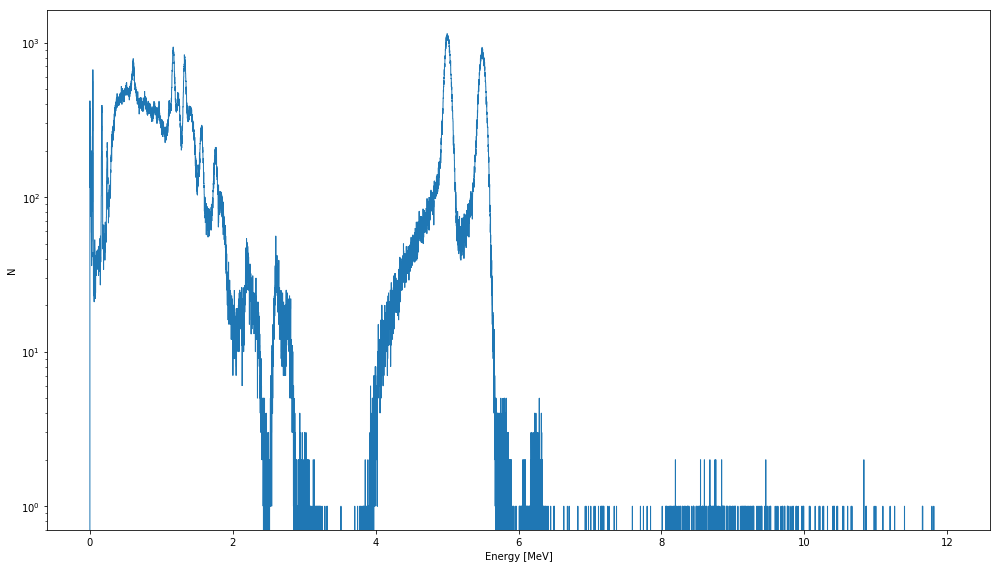

In [11]:
plt.figure(figsize=(14,8))
plt.hist(data4['CES']/10**6, bins = (10000), 
         range=(0, 12), 
         histtype='step')
plt.xlabel('Energy [MeV]')
plt.ylabel('N')
plt.yscale('log')

plt.tight_layout()
plt.show()

/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/matplotlib/colors.py:927: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


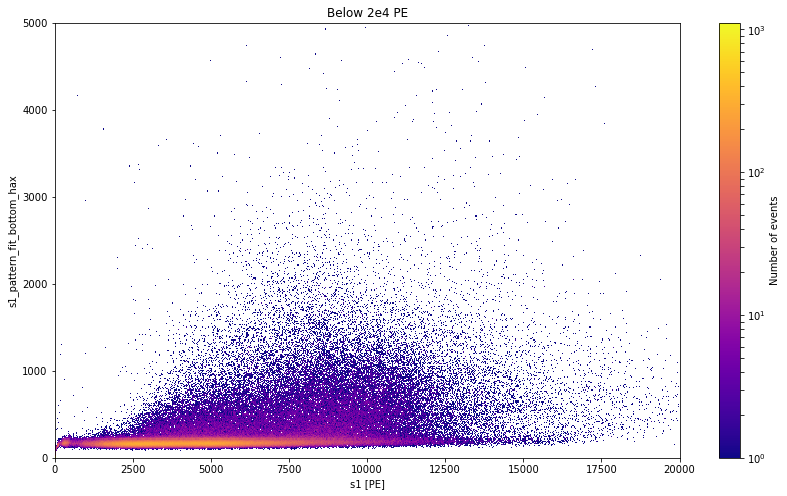

In [13]:
plt.figure(figsize=(14,8))
plt.hist2d(data4['s1'], data4['s1_pattern_fit_bottom_hax'], bins = (1000, 400), 
           range=((0,2e4), (0,5e3)), 
           cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), 
           cmin = 1,alpha = 1)
plt.colorbar(label='Number of events')
plt.title('Below 2e4 PE')
plt.xlabel('s1 [PE]')
plt.ylabel('s1_pattern_fit_bottom_hax')

In [14]:
data4.to_pickle('/project/lgrandi/giovo/pickle/pax_v6.10.1/BG_chiara_SR1.pkl')